# Experiment 2 — Add Contextual Features

**Goal:** Predict `final_grade` using academic, behavioral **AND** contextual features.  
**New features added:** `internet_access`, `travel_time`, `extra_activities`  

We test if environmental/contextual factors improve prediction compared to Experiment 1.  
This is **controlled feature experimentation** — same models, same data split, more features.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

import warnings
warnings.filterwarnings('ignore')

print('All imports loaded successfully!')

All imports loaded successfully!


## Step 1 — Load Cleaned Data
We load the same preprocessed train and test CSVs used in Experiment 1.

In [2]:
#Load the cleaned datasets
train_df = pd.read_csv('../datasets/train_cleaned.csv')
test_df  = pd.read_csv('../datasets/test_cleaned.csv')

print('Training data shape :', train_df.shape)
print('Test data shape     :', test_df.shape)
print('\nColumns available   :', list(train_df.columns))

Training data shape : (12000, 23)
Test data shape     : (3000, 23)

Columns available   : ['age', 'parent_education', 'study_hours', 'attendance_percentage', 'internet_access', 'travel_time', 'extra_activities', 'math_score', 'science_score', 'english_score', 'overall_score', 'gender_female', 'gender_male', 'gender_other', 'school_type_private', 'school_type_public', 'study_method_coaching', 'study_method_group study', 'study_method_mixed', 'study_method_notes', 'study_method_online videos', 'study_method_textbook', 'final_grade']


## Step 2 — Select Features (Academic + Behavioral + Contextual)

For Experiment 2, we have kept all features from Experiment 1 and **added** three contextual features:
- `internet_access` — does the student have internet at home?
- `travel_time` — how long does it take to commute?
- `extra_activities` — is the student involved in extra-curricular activities?

In [3]:
#Experiment 1 features (Academic + Behavioral)
exp1_features = [
    'study_hours',
    'attendance_percentage',
    'math_score',
    'science_score',
    'english_score',
    'study_method_coaching',
    'study_method_group study',
    'study_method_mixed',
    'study_method_notes',
    'study_method_online videos',
    'study_method_textbook'
]

# NEw contextual features for Experiment 2
contextual_features = [
    'internet_access',
    'travel_time',
    'extra_activities'
]

# Combine
exp2_features = exp1_features + contextual_features
X_train = train_df[exp2_features]
X_test  = test_df[exp2_features]

y_train = train_df['final_grade']
y_test  = test_df['final_grade']

print('Experiment 2 feature count :', len(exp2_features))
print('X_train shape              :', X_train.shape)
print('X_test  shape              :', X_test.shape)
print('\nNew contextual features added:', contextual_features)
print('\nTarget distribution (train):')
print(y_train.value_counts().sort_index())

Experiment 2 feature count : 14
X_train shape              : (12000, 14)
X_test  shape              : (3000, 14)

New contextual features added: ['internet_access', 'travel_time', 'extra_activities']

Target distribution (train):
final_grade
0    1437
1    2702
2    3016
3    2958
4    1310
5     577
Name: count, dtype: int64


## Step 3 — Train Models

1. **Logistic Regression** — linear baseline model
2. **Decision Tree** — non-linear model that captures complex patterns

In [4]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

print('Logistic Regression trained successfully!')

Logistic Regression trained successfully!


In [5]:
# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print('Decision Tree trained successfully!')

Decision Tree trained successfully!


## Step 4 — Evaluate Models

- **Accuracy** — overall correct predictions
- **Precision** — how many predicted positives are actually positive
- **Recall** — how many actual positives are correctly identified
- **F1 Score** — harmonic mean of precision and recall (important for imbalanced classes)
- **Confusion Matrix** — visual breakdown of predictions vs actual

In [6]:
# Generate predictions on the test set
lr_predictions = lr_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

print('Predictions generated for both models!')

Predictions generated for both models!


In [7]:
# Logistic Regression Evaluation
print('LOGISTIC REGRESSION — Results (Exp 2)')

lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f'\nAccuracy: {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)')

print('\nClassification Report:')
print(classification_report(y_test, lr_predictions))

LOGISTIC REGRESSION — Results (Exp 2)

Accuracy: 0.7723 (77.23%)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       359
           1       0.76      0.76      0.76       676
           2       0.76      0.79      0.77       754
           3       0.80      0.80      0.80       739
           4       0.68      0.71      0.70       328
           5       0.80      0.71      0.75       144

    accuracy                           0.77      3000
   macro avg       0.77      0.76      0.77      3000
weighted avg       0.77      0.77      0.77      3000



In [8]:
# Decision Tree Evaluation
print('DECISION TREE — Results (Exp 2)')

dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'\nAccuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)')

print('\nClassification Report:')
print(classification_report(y_test, dt_predictions))

DECISION TREE — Results (Exp 2)

Accuracy: 0.6590 (65.90%)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       359
           1       0.68      0.66      0.67       676
           2       0.67      0.68      0.67       754
           3       0.68      0.67      0.67       739
           4       0.50      0.51      0.50       328
           5       0.59      0.58      0.59       144

    accuracy                           0.66      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.66      0.66      0.66      3000



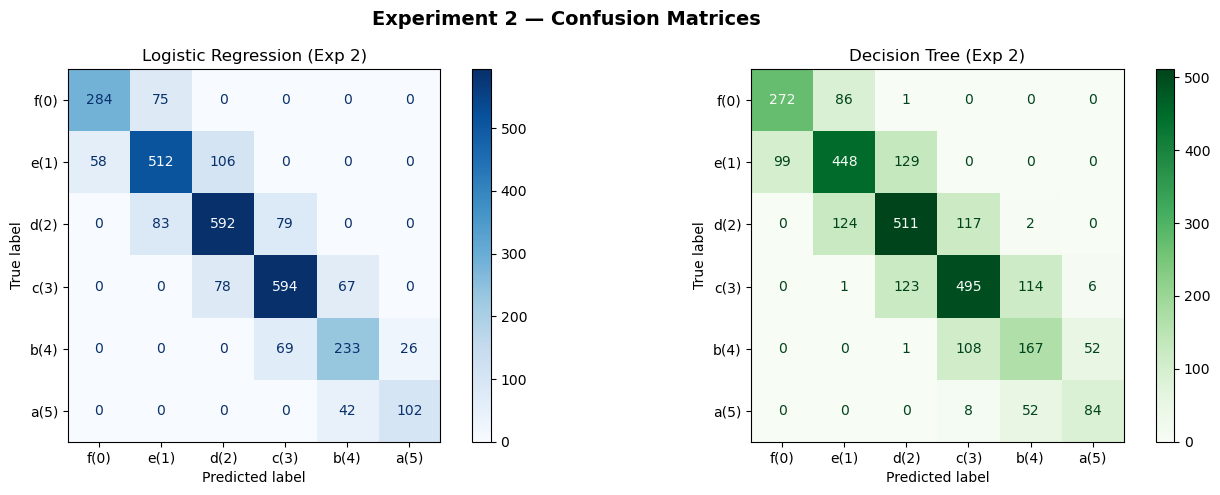

In [9]:
# Confusion Matrices
grade_labels = ['f(0)', 'e(1)', 'd(2)', 'c(3)', 'b(4)', 'a(5)']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, lr_predictions,
    display_labels=grade_labels,
    cmap='Blues',
    ax=axes[0]
)
axes[0].set_title('Logistic Regression (Exp 2)')

# Decision Tree confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, dt_predictions,
    display_labels=grade_labels,
    cmap='Greens',
    ax=axes[1]
)
axes[1].set_title('Decision Tree (Exp 2)')

plt.suptitle('Experiment 2 — Confusion Matrices', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Step 5 — Compare Results (Experiment 1 vs Experiment 2)

Now we compare the metrics from both experiments side-by-side.  
We use the **recorded metrics from Experiment 1** to build a comparison table.

In [10]:
#Exp1 Result
exp1_lr_acc = 0.7697
exp1_lr_f1  = 0.7698
exp1_dt_acc = 0.6643
exp1_dt_f1  = 0.6644

#Exp2 Result
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
dt_f1 = f1_score(y_test, dt_predictions, average='weighted')

#comparison table
comparison = pd.DataFrame({
    'Feature Set': [
        'Exp 1 (Academic + Behavioral)',
        'Exp 2 (+ Contextual)',
        'Exp 1 (Academic + Behavioral)',
        'Exp 2 (+ Contextual)'
    ],
    'Model': [
        'Logistic Regression',
        'Logistic Regression',
        'Decision Tree',
        'Decision Tree'
    ],
    'Accuracy': [
        round(exp1_lr_acc, 4),
        round(lr_accuracy, 4),
        round(exp1_dt_acc, 4),
        round(dt_accuracy, 4)
    ],
    'Weighted F1': [
        round(exp1_lr_f1, 4),
        round(lr_f1, 4),
        round(exp1_dt_f1, 4),
        round(dt_f1, 4)
    ]
})

print('Experiment 1 vs Experiment 2 — Results Comparison')
print(comparison.to_string(index=False))

Experiment 1 vs Experiment 2 — Results Comparison
                  Feature Set               Model  Accuracy  Weighted F1
Exp 1 (Academic + Behavioral) Logistic Regression    0.7697       0.7698
         Exp 2 (+ Contextual) Logistic Regression    0.7723       0.7725
Exp 1 (Academic + Behavioral)       Decision Tree    0.6643       0.6644
         Exp 2 (+ Contextual)       Decision Tree    0.6590       0.6590
